IA & Data science (LU3IN0226) -- 2020-2021
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Edoardo Sarti, Olivier Schwander.*


# TD-TME 5 : Réduction de dimensionnalité: visualisation & débruitage

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

*Double-cliquer ici et insérer les noms et prénoms de votre binôme*

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-05</tt> et rajouter à la suite de <tt>tme-05</tt> les noms des membres du binômes séparés par un tiret.

Par exemple, pour le binôme Luke Skywalker et Han Solo, le nom de fichier devient `tme-05-Skywalker-Solo`

Penser à sauvegarder fréquemment le fichier en cours de travail :
- soit en cliquant sur l'icône "disquette"
- soit par la combinaison de touches [Ctrl]-S

In [1]:
# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

In [2]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import pickle as pkl
%matplotlib inline  

In [3]:
# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut


# Visualisation de données

Nous proposons une série d'expériences pour appréhender la visualisation de données et la réduction de la dimensionnalité:

1. Comprendre la signification des valeurs propres et vecteurs propres sur les données gaussiennes sur lesquelles nous avons travaillé jusqu'ici
1. Générer un jeu de données jouet en 3D puis réduire la dimensionnalité
1. Appliquer cette réduction de dimension sur les données USPS

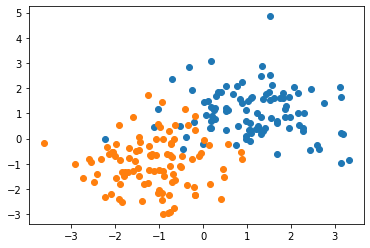

In [4]:
# Exemple d'utilisation:
np.random.seed(42)   # on prend 42 comme graine

# générer des données gaussienne 2D

N = 100
X,Y =  ut.genere_dataset_gaussian([-1,-1],[[1,0],[0,1]], [1, 1],[[1,0],[0,1]],N)

plt.figure()
plt.scatter(X[Y==1,0],X[Y==1,1])
plt.scatter(X[Y==-1,0],X[Y==-1,1])

Avant de poursuivre, répondez aux questions suivantes:
- Combien y a-t-il de vecteurs propres et de valeurs propres dans ce problème?
- Quel axe de plus forte variance est pressenti?

Réponses:


[Entrez votre réponse ici]



Vérifions maintenant avec du code.
L'idée est d'appliquer la fonction de la librairie Numpy: ```linalg.eig``` sur la matrice de correlation $X^T X$ et d'afficher les sorties pour les comprendre.

In [5]:
# Avant cela : 
# petit rappel sur les matrices:
M = np.array([[1,2,3],[4,5,6], [1, 0, 0]])
M

array([[1, 2, 3],
       [4, 5, 6],
       [1, 0, 0]])

In [6]:
# Transposée de M:
M.T

array([[1, 4, 1],
       [2, 5, 0],
       [3, 6, 0]])

In [7]:
# Produit de matrices:
M.T @ M

array([[18, 22, 27],
       [22, 29, 36],
       [27, 36, 45]])

**Important** : refaire les calculs précédents sur une feuille !

In [8]:
# Donner les instructions pour récupérer les valeurs propres et vecteurs propres 
# puis les afficher:




In [9]:
# tracer les vecteurs propres, à partir de (0,0) sur le scatter des points
# A l'aide de la commande plt.text, vous pouvez rajouter la "force" des axes si vous voulez




On voit bien la principale direction de variance (associée à la plus grande valeur propre)

## Réduction de données 2D => 1D

Dans une logique de réduction de dimensionnalité, on souhaite:
1. extraire automatiquement le vecteur propre associé à la plus grande valeur propre
1. projeter les données sur cet axe
1. afficher le plot 1D des données suivant:
    - x = nouvelle coordonée (unique) du point
    - y = étiquette

Cet affichage va nous permettre de comprendre ce que nous venons de faire.

<font color="RED" size="+1">**[Q]**</font> Donner les instructions qui réalise les 3 étapes données ci-dessus.


In [1]:
import math



Vous devez obtenir:

<table border="0">
 <tr>
    <td><img src="ressources/proj_1D.png" width=300px></td>
    <td>L'axe de plus forte variance semble bien intéressant pour distinguer les deux classes de données</td>
 </tr>
</table>

Pour mieux comprendre ce qui se passe, je vous propose la figure explicative suivante qui illustre ce que vous avez fait du point de vue géométrique:
<img src="ressources/proj_2D.png" width=300px>

**Note:** cette dernière figure est non-triviale à obtenir, il ne faut pas perdre du temps en TP à chercher comment faire :)

## Réduction de données d-D => 2D

Passons maintenant sur les données USPS pour essayer de reproduire les figures du cours 5.

In [15]:
# Chargement des données USPS

data = pkl.load(open('ressources/usps.pkl', 'rb'))
Xu = np.array(data['X_train'], dtype=float) # conversion de type pour une meilleure compatibilité
Yu = np.array(data['Y_train'], dtype=float)
XTu = np.array(data['X_test'], dtype=float) # conversion de type pour une meilleure compatibilité
YTu = np.array(data['Y_test'], dtype=float)


<font color="RED" size="+1">**[Q]**</font> Donner les instructions qui réalise les 3 étapes suivantes:

1. extraire automatiquement les 2 vecteurs propres associés aux 2 plus grandes valeurs propres sur les données USPS
1. projeter les données sur ces axes
    - projeter toutes les données
    - projeter seulement les 200 premières images (pour mieux voir)
1. afficher avec un code couleur correspondant aux classes

Cet affichage va nous permettre de comprendre ce que nous venons de faire.

In [2]:

# calcul VP + tri & sélection



Vous devez obtenir:
<table border="0">
 <tr>
    <td><img src="ressources/proj_usps_all.png"></td>
 </tr>
</table>

On a l'impression que les 0 et 1 sont bien séparés des autres classes... Le reste est un peu confus mais on voit que:
- les 8 et les 9 se ressemblent
- les 6 et les 3 dans une moindre mesure
- les 7 et les 4 un peu aussi
- les 2 sont en plein milieu

## Interprétation des vecteurs propres

Chacun de nos 2 axes contient beaucoup d'informations... Mais lesquelles?
Ces axes sont en 256 dimensions, il est possible de les tracer comme une image. Le truc est de distinguer les dimensions positives et les dimensions négatives.
On ne va pas reconstruire une échelle de couleur propre... Mais on peut a minima afficher l'échelle.

Le code est fourni ci-dessous.

<table border="0">
 <tr>
    <td><img src="ressources/vp_0.png"></td>
    <td><img src="ressources/vp_1.png"></td>
 </tr>
</table>

Le premier axe est sensible aux pixels allumés en haut et en bas: sur le premier axe de la figure de la boite précédente, on remarque que les chiffres les plus à droite sont le 0 et le 3... Ca colle.

Le second axe est sensible aux pixels à gauche et à droite (en positif) et aux pixels du centre (en négatif). On a bien les 0 en haut et les 1 en bas de ce second axe.

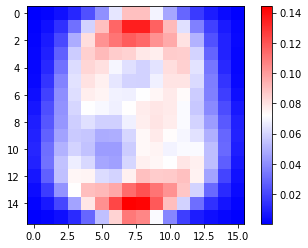

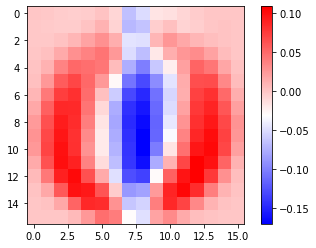

In [17]:
for i in range(vp.shape[1]):
    plt.figure()
    plt.imshow(vp[:,i].reshape(16,16),cmap='bwr')
    plt.colorbar()

## vers un espace de représentation débruité

Que se passe-t-il si on classe les points dans cet espace?
En 2d, on voit qu'il n'y a pas assez de dimension... Mais on peut:

1. Etudier les valeurs de toutes les valeurs propres (triées) pour voir combien sont importantes
    - soit on trie et on affiche les valeurs
    - soit on trace un histogramme des valeurs
1. Choisir un nombre de vecteurs propres par rapport à l'expérience précédente... On se rend compte que ce n'est pas évident: peu de valeur propre capte toute l'énergie. En tout état de cause, 20 valeurs propres semblent raisonnables
1. Projeter les données d'apprentissage et de test
1. Etudier le taux de bonne classification dans ce nouvel espace par rapport à l'espace d'origine

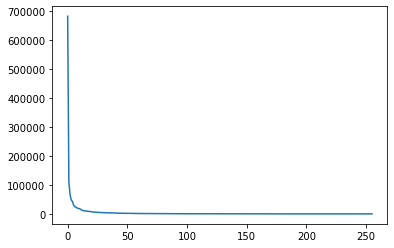

In [19]:
# Etude des valeurs propres

plt.figure()
plt.plot(lam)


In [20]:
# réduction à 20 dimensions
ndim = 20
Xr = Xu @ V[:,:ndim]
XTr = XTu @ V[:,:ndim]

In [10]:
# Exemple d'utilisation:
np.random.seed(42)   # on prend 42 comme graine

# Apprentissage d'un perceptron multiclasse

cl = classif.ClassifierPerceptron(ndim, 1e-3)
clmulti = classif.ClassifierMultiOAA(cl)

clmulti.train(Xr, Yu)
    
perf_A = clmulti.accuracy(Xr, Yu)
perf_T = clmulti.accuracy(XTr, YTu)
print("Perfs : ",perf_A, perf_T)


NameError: name 'ndim' is not defined

In [28]:
# Exemple d'utilisation:
np.random.seed(42)   # on prend 42 comme graine

# Apprentissage d'un perceptron multiclasse dans l'espace d'origine

cl = classif.ClassifierPerceptron(256, 1e-3)
clmulti = classif.ClassifierMultiOAA(cl)

clmulti.train(Xu, Yu)

perf_A = clmulti.accuracy(Xu, Yu)
perf_T = clmulti.accuracy(XTu, YTu)
print("Perfs : ",perf_A, perf_T)

Perfs :  0.8235671857441001 0.8312153796024764
